In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df_2019 = pd.read_csv("./Resources/2019loans.csv")

In [4]:
df_2020 = pd.read_csv("./Resources/2020Q1loans.csv")

In [5]:
df_2019.select_dtypes("object").apply(pd.Series.nunique, axis=0)


home_ownership          4
verification_status     3
loan_status             2
pymnt_plan              1
initial_list_status     2
application_type        2
hardship_flag           2
debt_settlement_flag    2
dtype: int64

In [6]:
df_2020.select_dtypes("object").apply(pd.Series.nunique, axis=0)

home_ownership          4
verification_status     3
loan_status             2
pymnt_plan              1
initial_list_status     2
application_type        2
hardship_flag           2
debt_settlement_flag    1
dtype: int64

In [7]:
df_2020.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [8]:
df_2019['int_rate'] = pd.Series([round(val, 2) for val in df_2019['int_rate']], index = df_2019.index)
df_2019['int_rate'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_2019['int_rate']], index = df_2019.index)

In [9]:
df_2019['int_rate'] = (pd.to_numeric(df_2019['int_rate'].str[:-1])
                            .div(100)
                            .mask(df_2019['int_rate'] == '%', 0))

[Text(0, 0, '0.06'),
 Text(1, 0, '0.07'),
 Text(2, 0, '0.08'),
 Text(3, 0, '0.09'),
 Text(4, 0, '0.1'),
 Text(5, 0, '0.11'),
 Text(6, 0, '0.12'),
 Text(7, 0, '0.13'),
 Text(8, 0, '0.14'),
 Text(9, 0, '0.15'),
 Text(10, 0, '0.16'),
 Text(11, 0, '0.17'),
 Text(12, 0, '0.18'),
 Text(13, 0, '0.19'),
 Text(14, 0, '0.2'),
 Text(15, 0, '0.21'),
 Text(16, 0, '0.22'),
 Text(17, 0, '0.23'),
 Text(18, 0, '0.24'),
 Text(19, 0, '0.25'),
 Text(20, 0, '0.26'),
 Text(21, 0, '0.27'),
 Text(22, 0, '0.29'),
 Text(23, 0, '0.31')]

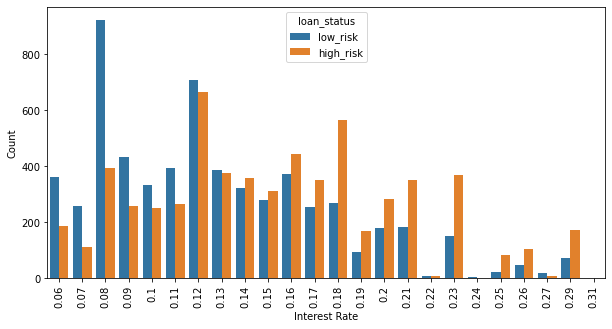

In [10]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x=df_2019['int_rate'].sort_values(), hue=df_2019['loan_status'])
chart.set(xlabel='Interest Rate', ylabel='Count')

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

C:\Users\TriciaToffey\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


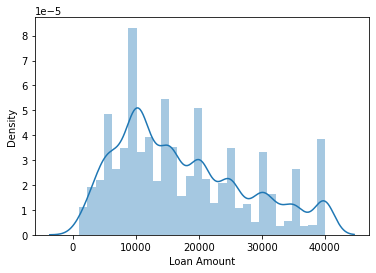

In [11]:
sns.distplot(df_2019['loan_amnt'], hist=True, kde=True, rug=False, norm_hist=True, axlabel='Loan Amount')
plt.show()

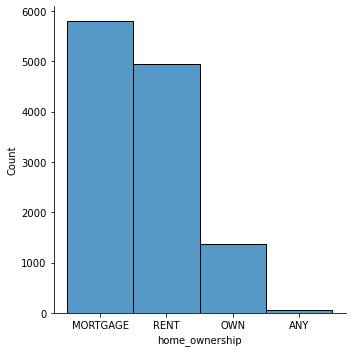

In [12]:
sns.displot(df_2019, x="home_ownership")

In [13]:
df_2019.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [14]:
df_2020.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [15]:
from sklearn import preprocessing

In [16]:
count = 0
for col in df_2019:
    if df_2019[col].dtype == 'object':
        if len(list(df_2019[col].unique())) <=2:
            le = preprocessing.LabelEncoder()
            df_2019[col]=le.fit_transform(df_2019[col])
            count += 1
            print(col)
            
print('%d columns were label encoded.' % count)

loan_status
pymnt_plan
initial_list_status
application_type
hardship_flag
debt_settlement_flag
6 columns were label encoded.


In [17]:
df_2019 = pd.get_dummies(df_2019)
df_2019

,loan_amnt,int_rate,installment,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,13375.0,0.18,483.34,223000.0,1,0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,1,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,0,0,1,0,0,1,0,0
1,21000.0,0.13,478.68,123000.0,1,0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,1,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,0,0,1,0,0,0,1,0
2,20000.0,0.12,448.95,197000.0,1,0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,1,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,0,0,1,0,0,0,1,0
3,3000.0,0.12,100.22,45000.0,1,0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,1,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,0,0,1,1,0,0
4,30000.0,0.16,1056.49,133000.0,1,0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,1,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.26,801.09,28000.0,0,0,28.42,0.0,0.0,15.0,0.0,9679.0,32.0,1,16305.16,16305.16,7

In [18]:
# X=df_2019.drop('loan_status', axis=1)
# y=df_2019['loan_status']


In [19]:
count = 0
for col in df_2020:
    if df_2020[col].dtype == 'object':
        if len(list(df_2020[col].unique())) <=2:
            le = preprocessing.LabelEncoder()
            df_2020[col]=le.fit_transform(df_2020[col])
            count += 1
            print(col)
            
print('%d columns were label encoded.' % count)

loan_status
pymnt_plan
initial_list_status
application_type
hardship_flag
debt_settlement_flag
6 columns were label encoded.


In [20]:
df_2020 = pd.get_dummies(df_2020)
df_2020

,loan_amnt,int_rate,installment,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,40000.0,0.0819,814.70,140000.0,1,0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,1,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.00,0.0000,814.70,0.0,1.0,0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,0,0,0,1,0,0,1,0,0
1,6000.0,0.1524,208.70,55000.0,1,0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,1,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.00,0.0000,5773.27,0.0,1.0,0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,0,0,0,0,0,1,1,0,0
2,3600.0,0.1695,128.27,42000.0,1,0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,1,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.00,0.0000,3607.12,0.0,1.0,0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,0,0,0,0,0,1,1,0,0
3,20000.0,0.1524,478.33,100000.0,1,0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,1,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.00,0.0000,478.33,0.0,1.0,0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,0,0,0,0,0,1,1,0,0
4,3600.0,0.1240,120.27,50000.0,1,0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,1,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.00,0.0000,3604.96,0.0,1.0,0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,0,0,15.74,0.0,0.0,20.0,0.0,23215.0,32.0,0,26196.18,26196.18,6713.53,6713.53,3803.82,2909.71,0.0,0.

In [21]:
X_train = df_2019.drop(['loan_status'], axis=1)
y_train = df_2019['loan_status']

In [22]:
X_test = df_2020.drop(['loan_status'], axis=1)
y_test = df_2020['loan_status']

In [23]:
#Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

[0.010953   0.01438987 0.05948529 0.01526156 0.         0.02364315
 0.00204337 0.00415017 0.0014946  0.00170037 0.0155049  0.00743
 0.0008105  0.01981781 0.02136672 0.02586143 0.00880254 0.11416911
 0.08500355 0.0276895  0.         0.         0.15794041 0.00028118
 0.         0.0009439  0.         0.00603353 0.00520249 0.00338575
 0.00721012 0.00218022 0.00482113 0.00812991 0.00883478 0.01352965
 0.00489436 0.00495736 0.01641584 0.0127615  0.01097923 0.00602574
 0.0082252  0.00670866 0.00435519 0.01416662 0.00942002 0.00992467
 0.00045114 0.         0.01796786 0.01899674 0.00789258 0.00900147
 0.00429481 0.01619349 0.00802001 0.00421005 0.0079129  0.00487929
 0.00432203 0.00296997 0.00867467 0.00479912 0.00666547 0.00497387
 0.00351375 0.         0.         0.00118559 0.00510247 0.00997732
 0.00510432 0.00017896 0.         0.00895204 0.01387545 0.01065744
 0.00960021 0.00525668 0.         0.00027842 0.00144421 0.0014608
 0.00024631 0.00048166 0.00235461 0.00119939]


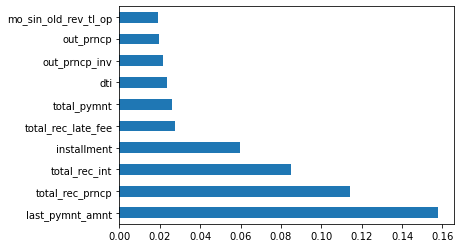

In [25]:
print(dtree.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(dtree.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [26]:
predictions = dtree.predict(X_test)

In [27]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.68      0.60      2351
           1       0.56      0.40      0.47      2351

    accuracy                           0.54      4702
   macro avg       0.55      0.54      0.53      4702
weighted avg       0.55      0.54      0.53      4702

[[1603  748]
 [1402  949]]


In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [29]:
lr = LogisticRegression(solver='liblinear', random_state=1)
lr.fit(X_train,y_train)


LogisticRegression(random_state=1, solver='liblinear')

In [30]:
pred = lr.predict(X_test)

In [31]:
accuracy = lr.score(X_test, y_test)

In [32]:
print(classification_report(y_test,predictions))
print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")
print(f"Accuracy Score: {accuracy}")

              precision    recall  f1-score   support

           0       0.53      0.68      0.60      2351
           1       0.56      0.40      0.47      2351

    accuracy                           0.54      4702
   macro avg       0.55      0.54      0.53      4702
weighted avg       0.55      0.54      0.53      4702

Training Data Score: 0.7087027914614121
Testing Data Score: 0.5744364100382816
Accuracy Score: 0.5744364100382816


In [33]:
predictions = lr.predict(X_test)
pd.DataFrame({"Predictions": predictions, "Actual": y_test})

,Predictions,Actual
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
4697,0,0
4698,1,0
4699,1,0
4700,1,0


In [34]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_estimators=600)

In [36]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [37]:
predictions=rfc.predict(X_test)
accuracy = rfc.score(X_test, y_test)

In [38]:
predictions = rfc.predict(X_test)
pd.DataFrame({"Predictions": predictions, "Actual": y_test})

,Predictions,Actual
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
4697,0,0
4698,0,0
4699,0,0
4700,1,0


In [39]:
print(classification_report(y_test,predictions))
print(f"Training Data Score: {rfc.score(X_train, y_train)}")
print(f"Testing Data Score: {rfc.score(X_test, y_test)}")
print(f"Accuracy Score: {accuracy}")

              precision    recall  f1-score   support

           0       0.61      0.81      0.70      2351
           1       0.72      0.48      0.57      2351

    accuracy                           0.64      4702
   macro avg       0.66      0.64      0.63      4702
weighted avg       0.66      0.64      0.63      4702

Training Data Score: 1.0
Testing Data Score: 0.644193960017014
Accuracy Score: 0.644193960017014


In [40]:
print(confusion_matrix(y_test, predictions))

[[1911  440]
 [1233 1118]]


In [41]:
#Scaled Data - LR
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [42]:
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')
print("Accuracy of model is: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2351
           1       0.76      0.77      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702

[[1786  565]
 [ 529 1822]]
Training Score: 0.708128078817734
Testing Score: 0.767333049766057
Accuracy of model is:  0.767333049766057


In [43]:
target_names = ['high_risk', 'low_risk']

In [44]:
#Scaled Data - Random Forest
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print("Accuracy of model is: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

   high_risk       0.60      0.80      0.68      2351
    low_risk       0.70      0.46      0.55      2351

    accuracy                           0.63      4702
   macro avg       0.65      0.63      0.62      4702
weighted avg       0.65      0.63      0.62      4702

Training Score: 1.0
Testing Score: 0.6299447043811144
Accuracy of model is:  0.6299447043811144


In [45]:
#MERGE DATASETS
frames=[df_2019, df_2020]

In [46]:
df = pd.concat(frames)
df

,loan_amnt,int_rate,installment,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,13375.0,0.1800,483.34,223000.0,1,0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,1,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.00,0.0000,483.34,0.0,1.0,0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,0,0,1,0,0,1,0,0
1,21000.0,0.1300,478.68,123000.0,1,0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,1,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.00,0.0000,478.68,0.0,1.0,0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,0,0,1,0,0,0,1,0
2,20000.0,0.1200,448.95,197000.0,1,0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,1,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.00,0.0000,448.95,0.0,1.0,0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,0,0,1,0,0,0,1,0
3,3000.0,0.1200,100.22,45000.0,1,0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,1,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.00,0.0000,85.76,1.0,1.0,0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,0,0,1,1,0,0
4,30000.0,0.1600,1056.49,133000.0,1,0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,1,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.00,0.0000,1056.49,0.0,1.0,0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,0,0,15.74,0.0,0.0,20.0,0.0,2

In [47]:
X=df.drop(['loan_status'], axis=1)
y=df['loan_status']

In [48]:
#Logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=1)

In [49]:
lr = LogisticRegression(solver='liblinear', random_state=1)
lr.fit(X_train, y_train)


LogisticRegression(random_state=1, solver='liblinear')

In [50]:
print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")

Training Data Score: 0.7125296208530806
Testing Data Score: 0.7060217176702863


In [51]:
lr.score(X, y)

0.7086245705485132

In [52]:
confusion_matrix(y, lr.predict(X))

array([[5464, 2977],
       [1942, 6499]], dtype=int64)

In [53]:
predictions = lr.predict(X_test)
pd.DataFrame({"Predictions": predictions, "Actual": y_test})

,Predictions,Actual
2687,1,1
27,1,1
1067,1,1
2819,1,1
3301,1,0
...,...,...
1127,1,1
4932,0,1
8195,0,0
931,1,1


In [54]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(n_estimators=600)

In [56]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [57]:
predictions=rfc.predict(X_test)

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      4959
           1       0.78      0.77      0.78      5171

    accuracy                           0.77     10130
   macro avg       0.77      0.77      0.77     10130
weighted avg       0.77      0.77      0.77     10130



In [59]:
print(confusion_matrix(y_test, predictions))

[[3868 1091]
 [1203 3968]]


In [60]:
#Scaled Data - LR
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [61]:
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')
print("Accuracy of model is: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      4959
           1       0.69      0.76      0.72      5171

    accuracy                           0.70     10130
   macro avg       0.70      0.70      0.70     10130
weighted avg       0.70      0.70      0.70     10130

[[3192 1767]
 [1254 3917]]
Training Score: 0.7134182464454977
Testing Score: 0.70177690029615
Accuracy of model is:  0.70177690029615


In [62]:
#Scaled Data - Random Forest
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print("Accuracy of model is: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

   high_risk       0.75      0.78      0.76      4959
    low_risk       0.78      0.75      0.77      5171

    accuracy                           0.76     10130
   macro avg       0.76      0.76      0.76     10130
weighted avg       0.77      0.76      0.76     10130

Training Score: 1.0
Testing Score: 0.7645607107601184
Accuracy of model is:  0.7645607107601184


In [63]:
y_true = y_test
confusion_matrix(y_true, y_pred)

array([[3857, 1102],
       [1283, 3888]], dtype=int64)